In [ ]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk
import matplotlib.pylab as plt
from itertools import combinations

In [ ]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        if label == '10-4':
            data_pd_i['Concentration'] = '1 * $10^{-4}$M'
        if label == '10-5':
            data_pd_i['Concentration'] = '1 * $10^{-5}$M'
        if label == '10-6':
            data_pd_i['Concentration'] = '1 * $10^{-6}$M'
        if label == '10-7':
            data_pd_i['Concentration'] = '1 * $10^{-7}$M'
        if label == 'Control':
            data_pd_i['Concentration'] = 'Control'
        if label == 'Blank':
            data_pd_i['Concentration'] = 'Blank'


        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [ ]:

folder_path = 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted_blank'

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

In [ ]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   if '.csv' in file_name_ext:
      print(file)
      file_raw = pd.read_csv(file) 
   
   if '.xlsx' in file_name_ext:
      file_raw = pd.read_excel(file) 
      print(file)

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

print(data_pd)

In [61]:
unique_substances= data_pd['Concentration'].unique()

unique_concentrations= data_pd['Substance'].unique()

print(unique_substances)

print(unique_concentrations)

['1 * $10^{-4}$M' '1 * $10^{-5}$M' '1 * $10^{-6}$M' 'Control' 'Blank']
['24-08-2023 BSN1a' '24-08-2023 BSN1b' '24-08-2023 BSN2a'
 '24-08-2023 BSN2b']


In [62]:
data_extracted_substance = data_pd[(data_pd['Substance'] == '24-08-2023 BSN1b')].copy() 
blank = data_extracted_substance[(data_extracted_substance['Concentration'] == 'Blank')].mean().to_numpy()

data_extracted_substance['OD'].dropna(inplace=True)

data_extracted_substance['OD_blank_correcetd'] = data_extracted_substance['OD'] - blank

# data_extracted_substance.drop('Blank', axis=1, inplace=True)

data_extracted_substance = data_extracted_substance[data_extracted_substance['Concentration'] != 'Blank']

print(data_extracted_substance)

       OD Cell_type         Substance   Concentration  OD_blank_correcetd
0     NaN      Vero  24-08-2023 BSN1b  1 * $10^{-4}$M                 NaN
1   0.246      Vero  24-08-2023 BSN1b  1 * $10^{-4}$M              0.0745
2   0.257      Vero  24-08-2023 BSN1b  1 * $10^{-4}$M              0.0855
3   0.226      Vero  24-08-2023 BSN1b  1 * $10^{-4}$M              0.0545
4   0.201      Vero  24-08-2023 BSN1b  1 * $10^{-4}$M              0.0295
..    ...       ...               ...             ...                 ...
19  0.175      Vero  24-08-2023 BSN1b         Control              0.0035
20  0.230      Vero  24-08-2023 BSN1b         Control              0.0585
21  0.230      Vero  24-08-2023 BSN1b         Control              0.0585
22  0.279      Vero  24-08-2023 BSN1b         Control              0.1075
23  0.096      Vero  24-08-2023 BSN1b         Control             -0.0755

[96 rows x 5 columns]


C:\Users\Modern\AppData\Local\Temp\ipykernel_3908\2871057822.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  blank = data_extracted_substance[(data_extracted_substance['Concentration'] == 'Blank')].mean().to_numpy()


In [63]:
# data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_extracted_substance[(data_extracted_substance['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD_blank_correcetd'].mean()
    data_i['Relative'] = data_i['OD_blank_correcetd']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

       OD    Relative         Substance   Concentration Cell_type  \
0     NaN         NaN  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
1   0.246  184.743935  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
2   0.257  212.021563  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
3   0.226  135.148248  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
4   0.201   73.153639  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
..    ...         ...               ...             ...       ...   
19  0.175    8.679245  24-08-2023 BSN1b         Control      Vero   
20  0.230  145.067385  24-08-2023 BSN1b         Control      Vero   
21  0.230  145.067385  24-08-2023 BSN1b         Control      Vero   
22  0.279  266.576819  24-08-2023 BSN1b         Control      Vero   
23  0.096 -187.223720  24-08-2023 BSN1b         Control      Vero   

    OD_blank_correcetd  
0                  NaN  
1               0.0745  
2               0.0855  
3               0.0545  
4               0.0295  
..                 ..

In [64]:


unique_concentrations= data['Concentration'].unique()
unique_substances= data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))
        

print(pairs)

[(('24-08-2023 BSN1b', '1 * $10^{-4}$M'), ('24-08-2023 BSN1b', 'Control')), (('24-08-2023 BSN1b', '1 * $10^{-5}$M'), ('24-08-2023 BSN1b', 'Control')), (('24-08-2023 BSN1b', '1 * $10^{-6}$M'), ('24-08-2023 BSN1b', 'Control')), (('24-08-2023 BSN1b', 'Control'), ('24-08-2023 BSN1b', 'Control'))]


       OD    Relative         Substance   Concentration Cell_type  \
0     NaN         NaN  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
1   0.246  184.743935  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
2   0.257  212.021563  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
3   0.226  135.148248  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
4   0.201   73.153639  24-08-2023 BSN1b  1 * $10^{-4}$M      Vero   
..    ...         ...               ...             ...       ...   
19  0.175    8.679245  24-08-2023 BSN1b         Control      Vero   
20  0.230  145.067385  24-08-2023 BSN1b         Control      Vero   
21  0.230  145.067385  24-08-2023 BSN1b         Control      Vero   
22  0.279  266.576819  24-08-2023 BSN1b         Control      Vero   
23  0.096 -187.223720  24-08-2023 BSN1b         Control      Vero   

    OD_blank_correcetd  
0                  NaN  
1               0.0745  
2               0.0855  
3               0.0545  
4               0.0295  
..                 ..

(<AxesSubplot: ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x2125ed2bd30>])

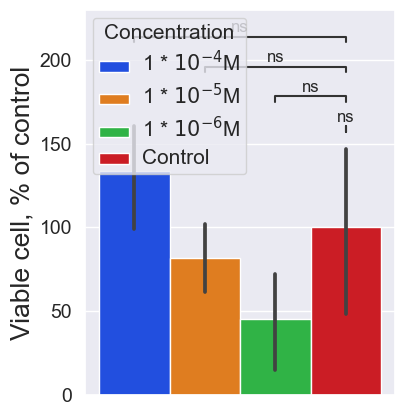

In [65]:
ax = sns.barplot(data = data, x = 'Substance', y = 'Relative', hue = 'Concentration',palette='bright')

print(data)

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,5)})

ax.legend(loc='upper left', title='Concentration')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='15') 

ax.set(xlabel=None, ylabel='Viable cell, % of control')
ax.set(xticklabels=[])
ax.yaxis.get_label().set_fontsize(19)
ax.xaxis.get_label().set_fontsize(19)
ax.tick_params(axis='y', which='major', labelsize=14)

annotator = Annotator(ax, pairs, data=data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()